In [1]:
import numpy as np
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pg = pd.read_csv(r"D:\Datasets\banglorepgfinal.csv")

In [4]:
pg

,PG_Names,Gender,Food,Single_Room,Twin_Sharing,Triple_Sharing,Four_Sharing,Location
0,Zolo Maple,Coed,Food Charge extra,23000,13000,9500,10000,SG Palya
1,Zolo Polaris,Coed,Food Charge extra,15500,10500,8000,10000,SG Palya
2,Indiranagar ladies,Girls,Food Included,22250,12000,12000,10000,Indiranagar
3,Bluebell Prime,Girls,Food Included,29000,23000,18000,9687,Mahatma Gandhi Road
4,Nirrvana,Girls,Food Included,22000,12000,9000,9375,Koramangala
...,...,...,...,...,...,...,...,...
776,Sri Sai Balaji Ladies,Girls,Food Included,6000,5800,5000,4400,Stage 1 BTM Layout
777,Mohan girl and boy,Coed,Food Included,12000,7500,5000,5700,Basavanagudi
778,Colours,Girls,Food Included,12250,12000,9000,7000,Domlur
779,Zolo Anise,Boys,Food Included,12500,6750,5700,4000,Marathahalli


In [5]:
pg.drop(['Four_Sharing'], axis=1, inplace = True)

In [6]:
pg.drop(pg[pg['Single_Room'] > 39000].index, inplace=True)

In [7]:
pg.drop(pg[pg['Twin_Sharing'] > 39000].index, inplace=True)
pg.drop(pg[pg['Triple_Sharing'] > 39000].index, inplace=True)

In [8]:
pg

,PG_Names,Gender,Food,Single_Room,Twin_Sharing,Triple_Sharing,Location
0,Zolo Maple,Coed,Food Charge extra,23000,13000,9500,SG Palya
1,Zolo Polaris,Coed,Food Charge extra,15500,10500,8000,SG Palya
2,Indiranagar ladies,Girls,Food Included,22250,12000,12000,Indiranagar
3,Bluebell Prime,Girls,Food Included,29000,23000,18000,Mahatma Gandhi Road
4,Nirrvana,Girls,Food Included,22000,12000,9000,Koramangala
...,...,...,...,...,...,...,...
776,Sri Sai Balaji Ladies,Girls,Food Included,6000,5800,5000,Stage 1 BTM Layout
777,Mohan girl and boy,Coed,Food Included,12000,7500,5000,Basavanagudi
778,Colours,Girls,Food Included,12250,12000,9000,Domlur
779,Zolo Anise,Boys,Food Included,12500,6750,5700,Marathahalli


In [9]:
pg.to_csv('D:/Datasets/BangloreFinal1.csv')

###  1. Uni-variate Analysis:

In [10]:
pg.count()

PG_Names          777
Gender            777
Food              777
Single_Room       777
Twin_Sharing      777
Triple_Sharing    777
Location          777
dtype: int64

Text(0.5, 1.0, 'PG Based On Gender')

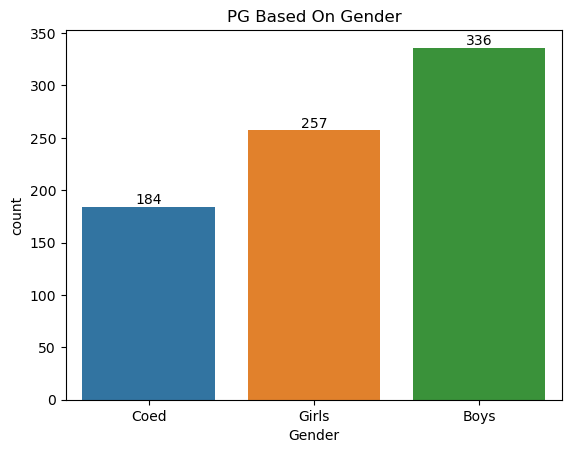

In [11]:
ax =sns.countplot(x='Gender', data=pg, )
for container in ax.containers:
    ax.bar_label(container)
plt.title('PG Based On Gender')
#plt.ylable('Number of PG')
#plt.xlable('Gender')

* Insights
* Analyzing PG based on gender
1. Coed PG are 184 of the total number of PG which is less among all.
2. Girls PG are 257 of the total number of PG.
3. Boys PG are 336 of the total number of PG which is more among all.
4. There is imbalace between the gender count.

In [12]:
x = pd.DataFrame(pg["Gender"].value_counts())

In [13]:
x

,Gender
Boys,336
Girls,257
Coed,184


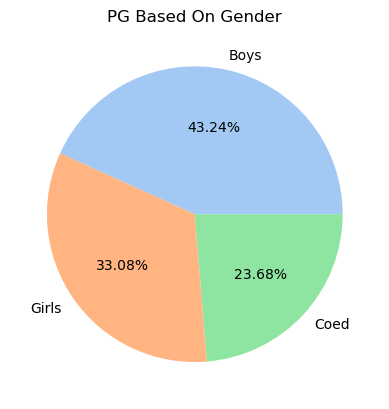

In [14]:
colors = sns.color_palette('pastel')
plt.pie(x['Gender'], labels = x.index, colors=colors, autopct="%.2f%%" )
plt.title('PG Based On Gender')
plt.show()


* Insights
* Analyzing PG based on gender
1. Coed PG are 23.68% of the total PG which is less among all.
2. Girls PG are 33.08% of the total of PG.
3. Boys PG are 43.24% of the total number of PG which is more among all.
4. There is imbalace between the gender percentage.

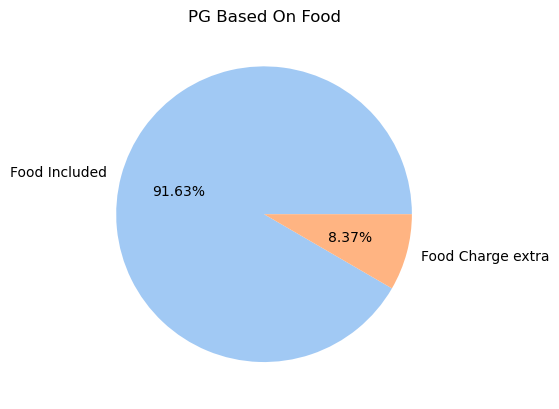

In [15]:
y = pd.DataFrame(pg['Food'].value_counts())
colors = sns.color_palette('pastel')
plt.pie(y['Food'], labels = y.index, colors=colors, autopct="%.2f%%" )
plt.title('PG Based On Food')
plt.show()

* Insights
* Analyzing PG based on Food
1. 91.63% of the PG include food as part of facility.
2. 8.37% of the PG takin extra charges for food .
3. Majority of the PG Providing Food, may be they are in high demand compare to PG which are taking extra charges for food.

In [16]:
a = pg['Location'].value_counts()

In [17]:
a

 Marathahalli                     39
 Whitefield                       35
 Phase 2 Electronic City          33
 Stage 1 BTM Layout               32
 Phase 1 Electronics City         31
                                  ..
 Mathikere Extension               1
 BEML Layout Basaveshwar Nagar     1
 Govindapura Nagavara              1
 Yelahanka New Town                1
 Chamundeshwari Layout             1
Name: Location, Length: 215, dtype: int64

In [18]:
a

 Marathahalli                     39
 Whitefield                       35
 Phase 2 Electronic City          33
 Stage 1 BTM Layout               32
 Phase 1 Electronics City         31
                                  ..
 Mathikere Extension               1
 BEML Layout Basaveshwar Nagar     1
 Govindapura Nagavara              1
 Yelahanka New Town                1
 Chamundeshwari Layout             1
Name: Location, Length: 215, dtype: int64

In [19]:
thresh = 20
a[a<thresh].sum()

513

In [20]:
thresh = 20
a['others']= a[a<thresh].sum()

In [21]:
a=a[a>=thresh]

In [22]:
a = pd.DataFrame(a)
a

,Location
Marathahalli,39
Whitefield,35
Phase 2 Electronic City,33
Stage 1 BTM Layout,32
Phase 1 Electronics City,31
Indiranagar,31
Nagavara,22
Bellandur,21
Btm Layout,20
others,513


In [23]:
pg['Location_modified'] = pg['Location'].map(lambda x: x if x in a.index else 'others')

In [24]:
pg

,PG_Names,Gender,Food,Single_Room,Twin_Sharing,Triple_Sharing,Location,Location_modified
0,Zolo Maple,Coed,Food Charge extra,23000,13000,9500,SG Palya,others
1,Zolo Polaris,Coed,Food Charge extra,15500,10500,8000,SG Palya,others
2,Indiranagar ladies,Girls,Food Included,22250,12000,12000,Indiranagar,Indiranagar
3,Bluebell Prime,Girls,Food Included,29000,23000,18000,Mahatma Gandhi Road,others
4,Nirrvana,Girls,Food Included,22000,12000,9000,Koramangala,others
...,...,...,...,...,...,...,...,...
776,Sri Sai Balaji Ladies,Girls,Food Included,6000,5800,5000,Stage 1 BTM Layout,Stage 1 BTM Layout
777,Mohan girl and boy,Coed,Food Included,12000,7500,5000,Basavanagudi,others
778,Colours,Girls,Food Included,12250,12000,9000,Domlur,others
779,Zolo Anise,Boys,Food Included,12500,6750,5700,Marathahalli,Marathahalli


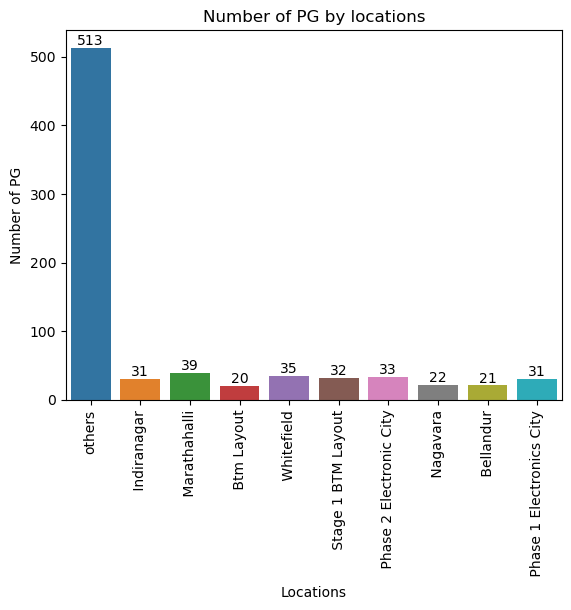

In [25]:

ax = sns.countplot(x='Location_modified', data=pg)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of PG by locations')
plt.xlabel('Locations')
plt.ylabel('Number of PG')
plt.xticks(rotation = 90)
plt.show()

* Insights
* Analyzing Number of pg by location.
1. Multiple areas of cities having less than 20 pg are grouped under others they are 513 in number.
2. Highest number of PG are located in Marathahalli i.e. 39 followed by Whitefilled i.e. 35 followed by Phase 2 Electronic City i.e.33.
3. May be this could be due to education institutions, job hubs, public transportation and other amenties

In [26]:
# Boxplot

In [27]:
Q1 = pg[['Single_Room','Twin_Sharing', 'Triple_Sharing']].quantile(0.25)
Q3 = pg[['Single_Room','Twin_Sharing', 'Triple_Sharing']].quantile(0.75)
Q2 = pg[['Single_Room','Twin_Sharing', 'Triple_Sharing']].quantile(0.50)
Q1, Q3, Q2


(Single_Room       10000.0
 Twin_Sharing       7000.0
 Triple_Sharing     5900.0
 Name: 0.25, dtype: float64,
 Single_Room       16000.0
 Twin_Sharing      10000.0
 Triple_Sharing     8000.0
 Name: 0.75, dtype: float64,
 Single_Room       13000.0
 Twin_Sharing       8400.0
 Triple_Sharing     6500.0
 Name: 0.5, dtype: float64)

In [28]:
IQR = Q3 - Q1
IQR

Single_Room       6000.0
Twin_Sharing      3000.0
Triple_Sharing    2100.0
dtype: float64

In [29]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(Single_Room       1000.0
 Twin_Sharing      2500.0
 Triple_Sharing    2750.0
 dtype: float64,
 Single_Room       25000.0
 Twin_Sharing      14500.0
 Triple_Sharing    11150.0
 dtype: float64)

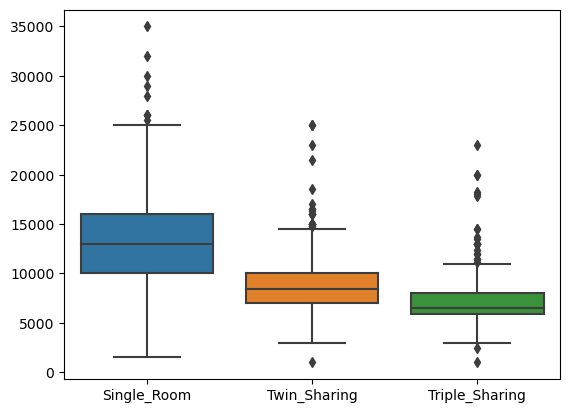

In [30]:
ax = sns.boxplot(pg)

* Insights
* Analyzing Outliers of Prices using box-plot.
1. Single room 
    * Whiskers line shows single room prices ranges from 1000rs to 25000rs.
    * Price distribution of Single room high between 10000rs to 16000rs.
    * Median price of single room is 13000rs.
    * Single room prices above 25000rs are outliers.
2. Twin Sharing 
    * Whiskers line shows twin sharing prices ranges from 2500rs to 14500rs.
    * Price distribution of twin sharing high between 7000rs to 10000rs.
    * Median price of twin sharing is 8400rs.
    * Twin sharing prices above 14500rs and below 2500rs are outliers.
1. Triple  Sharing
    * Whiskers line shows triple sharing prices ranges from 2750rs to 11150rs.
    * Price distribution of triple sharing high between 5900rs to 8000rs.
    * Median price of triple sharing is 6500rs.
    * Triple sharing prices above 11150rs and below 2750 are outliers.





<Axes: >

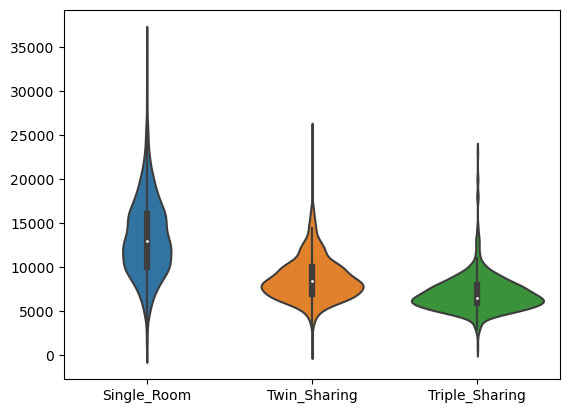

In [31]:
sns.violinplot(pg)

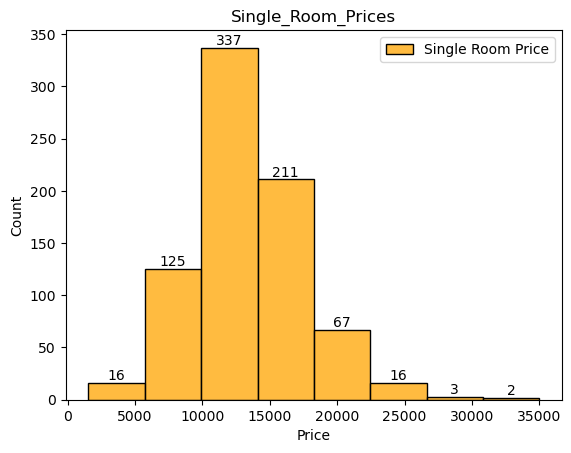

In [32]:

ax =sns.histplot(pg['Single_Room'], bins=8, color='orange', label = 'Single Room Price')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Single_Room_Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()

* Insights
* Analyzing price of single room
1. Majority of PG's single room price lies between 10000rs to 14000rs i.e.337 considering as affordable PG.
2. Less PG's single room price lies between 26000 to 35000 considering Premium PG.
3. PG's single room price lies below 6000 are cheapest PG


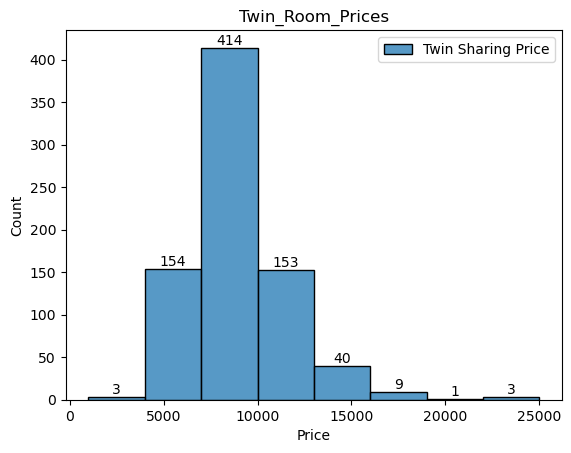

In [33]:

ax = sns.histplot(pg['Twin_Sharing'],bins=8, label = 'Twin Sharing Price')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Twin_Room_Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()

* Insights
* Analyzing price of Twin sharing
1. Majority of PG's Twin sharing price lies between 7000rs to 10000rs i.e.414 considering as affordable PG.
2. Less PG's Twin sharing price lies between 16000 to 25000 considering Premium PG.
3. PG's Twin sharing price lies below 5000 are cheapest PG

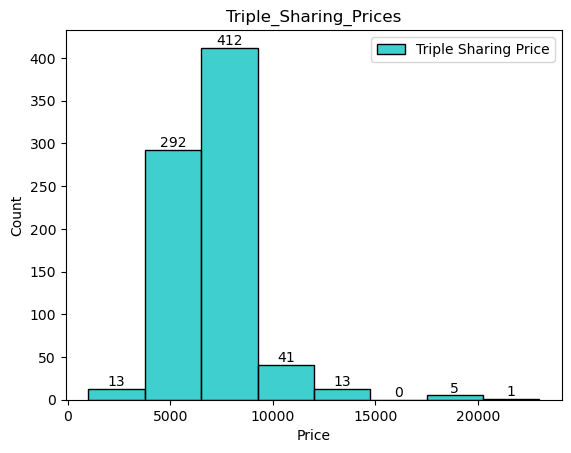

In [34]:
ax = sns.histplot(pg['Triple_Sharing'], bins=8, color = 'c', label = 'Triple Sharing Price'
            )
for container in ax.containers:
    ax.bar_label(container)
plt.title("Triple_Sharing_Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()

* Insights
* Analyzing price of triple sharing
1. Majority of PG's triple sharing price lies between 7000rs to 9000rs i.e.412 considering as affordable PG.
2. Less PG's triple sharing price lies between 13000 to 25000 considering Premium PG.
3. PG's triple sharing price lies below 4000 are cheapest PG

Text(0.5, 0, 'Count')

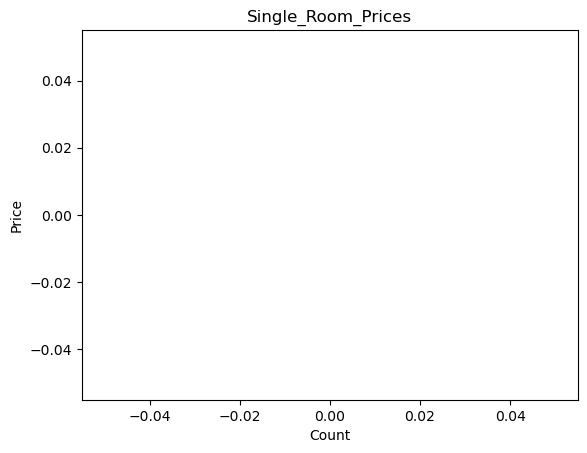

In [35]:

sns.scatterplot(x=pg["Single_Room"], color = 'orange')
plt.title("Single_Room_Prices")
plt.ylabel("Price")
plt.xlabel("Count")


* Insights
* Analyzing Price distribution of Single room.
1. More number of twin sharing between around8000rs to 16000rs.

Text(0.5, 0, 'Count')

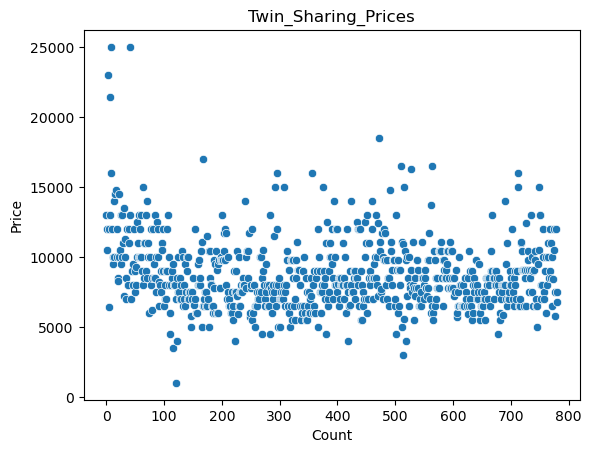

In [36]:
sns.scatterplot(x=pg.index,y=pg["Twin_Sharing"])
plt.title("Twin_Sharing_Prices")
plt.ylabel("Price")
plt.xlabel("Count")

* Insights
* Analyzing Price distribution of twin sharing.
1. More number of twin sharing between around 5000rs to 10000rs.

Text(0.5, 0, 'Count')

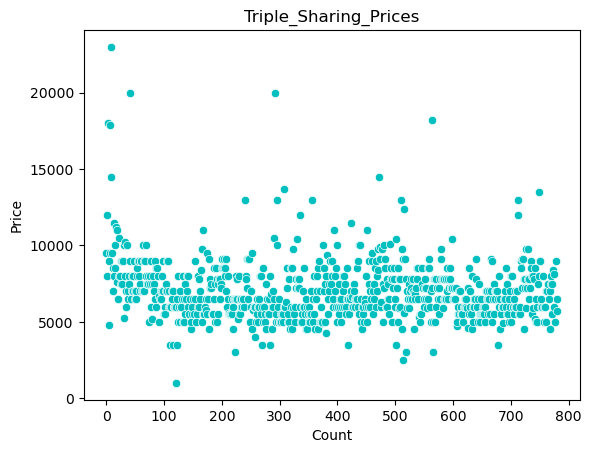

In [37]:
sns.scatterplot(x=pg.index,y=pg["Triple_Sharing"], color='c')
plt.title("Triple_Sharing_Prices")
plt.ylabel("Price")
plt.xlabel("Count")

* Insights
* Analyzing Price distribution of triple sharing.
1. More number of triple sharing between around 5000rs to 9000rs.

## 2. Bi-variate /Multivariate Analysis : 

In [38]:
pg

,PG_Names,Gender,Food,Single_Room,Twin_Sharing,Triple_Sharing,Location,Location_modified
0,Zolo Maple,Coed,Food Charge extra,23000,13000,9500,SG Palya,others
1,Zolo Polaris,Coed,Food Charge extra,15500,10500,8000,SG Palya,others
2,Indiranagar ladies,Girls,Food Included,22250,12000,12000,Indiranagar,Indiranagar
3,Bluebell Prime,Girls,Food Included,29000,23000,18000,Mahatma Gandhi Road,others
4,Nirrvana,Girls,Food Included,22000,12000,9000,Koramangala,others
...,...,...,...,...,...,...,...,...
776,Sri Sai Balaji Ladies,Girls,Food Included,6000,5800,5000,Stage 1 BTM Layout,Stage 1 BTM Layout
777,Mohan girl and boy,Coed,Food Included,12000,7500,5000,Basavanagudi,others
778,Colours,Girls,Food Included,12250,12000,9000,Domlur,others
779,Zolo Anise,Boys,Food Included,12500,6750,5700,Marathahalli,Marathahalli


Text(0, 0.5, 'Count')

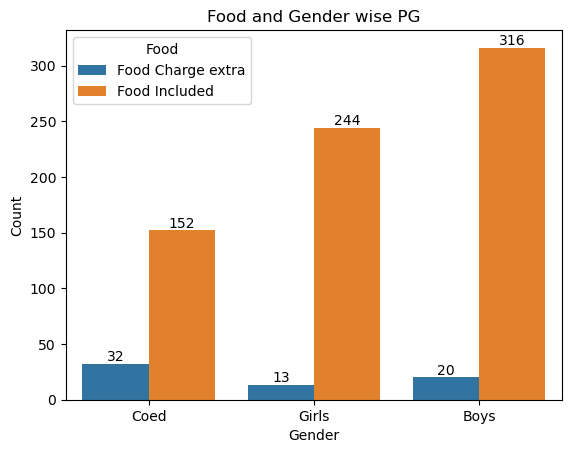

In [39]:
ax = sns.countplot(x = 'Gender', hue='Food', data=pg)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Food and Gender wise PG")
plt.xlabel("Gender")
plt.ylabel("Count")

* Insights
* Analyzing PG based on gender and food
1. More number of boys PG providing food and 

<Axes: ylabel='Triple_Sharing'>

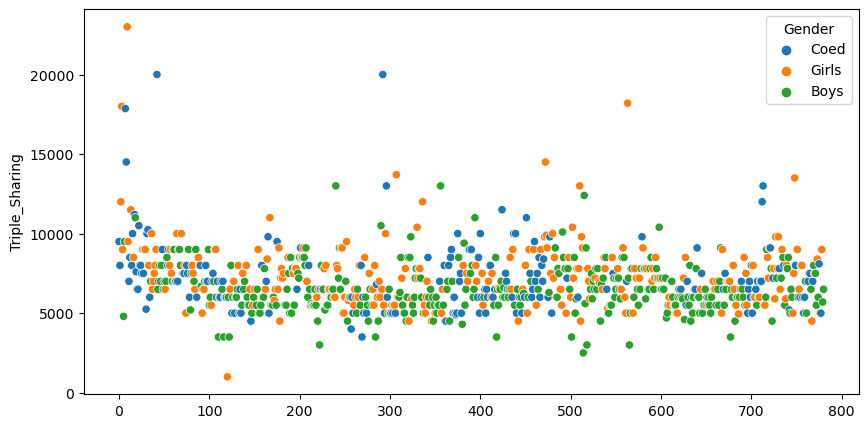

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=pg.index,y=pg["Triple_Sharing"], hue = 'Gender' , data=pg) 

<Axes: ylabel='Twin_Sharing'>

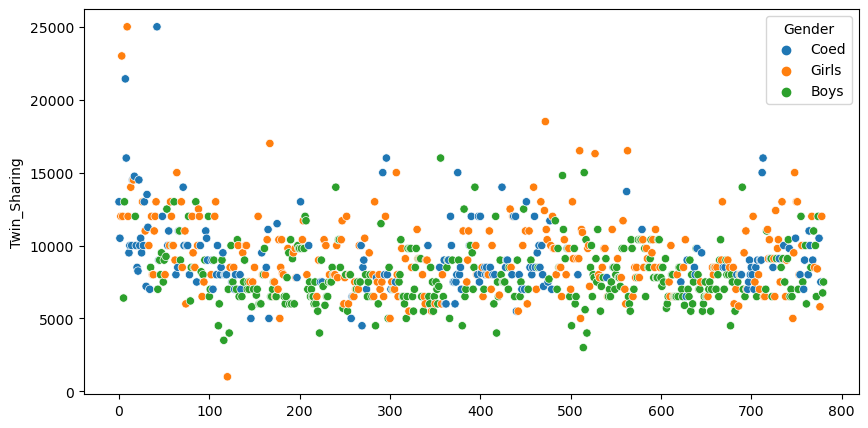

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=pg.index,y=pg["Twin_Sharing"], hue = 'Gender' ,data=pg) 

<Axes: ylabel='Single_Room'>

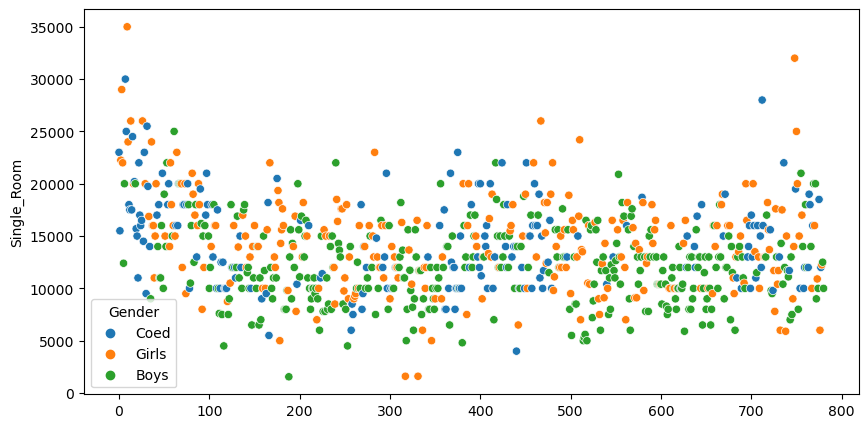

In [42]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pg.index,y=pg["Single_Room"], hue = 'Gender' ,data=pg) 

<Axes: ylabel='Single_Room'>

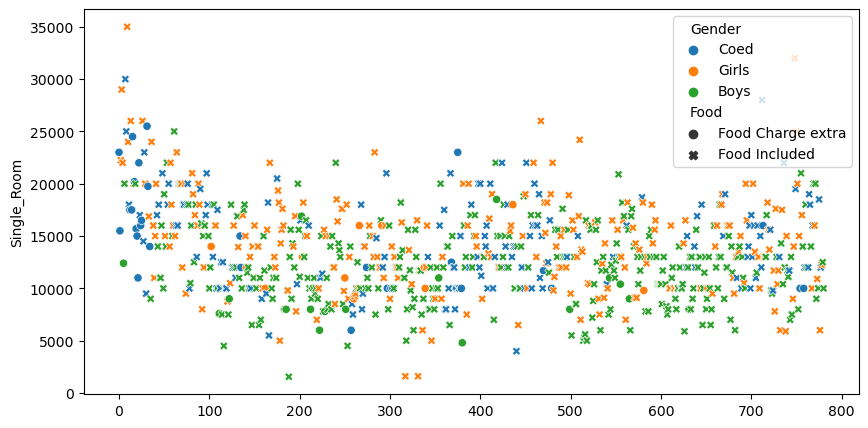

In [43]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pg.index,y=pg["Single_Room"], hue = 'Gender', style = 'Food', data=pg) 

<Axes: ylabel='Twin_Sharing'>

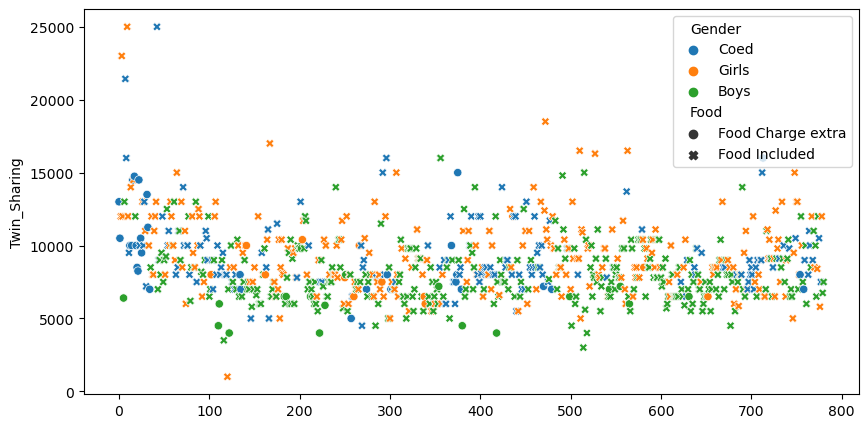

In [44]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pg.index,y=pg["Twin_Sharing"], hue = 'Gender', style = 'Food', data=pg)

<Axes: ylabel='Triple_Sharing'>

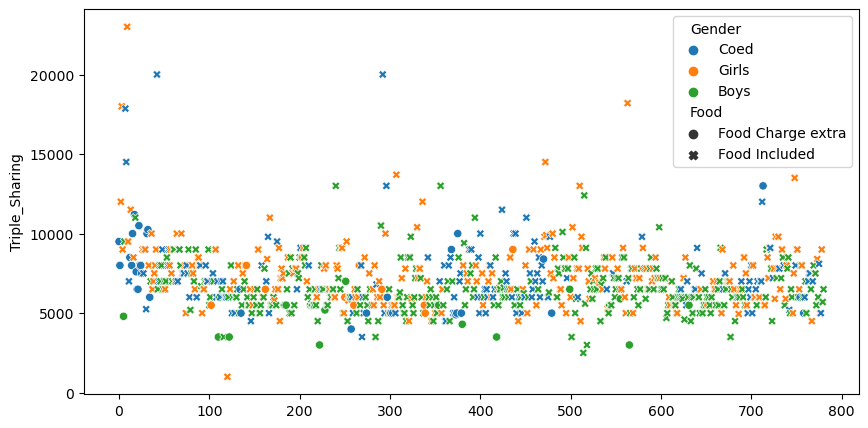

In [45]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pg.index,y=pg["Triple_Sharing"], hue = 'Gender', style = 'Food', data=pg)

In [46]:

melted_df = pd.melt(pg, value_vars=['Single_Room', 'Twin_Sharing', 'Triple_Sharing', ], var_name='Room Type',   value_name='Price')

In [47]:
melted_df

,Room Type,Price
0,Single_Room,23000
1,Single_Room,15500
2,Single_Room,22250
3,Single_Room,29000
4,Single_Room,22000
...,...,...
2326,Triple_Sharing,5000
2327,Triple_Sharing,5000
2328,Triple_Sharing,9000
2329,Triple_Sharing,5700


<Axes: ylabel='Price'>

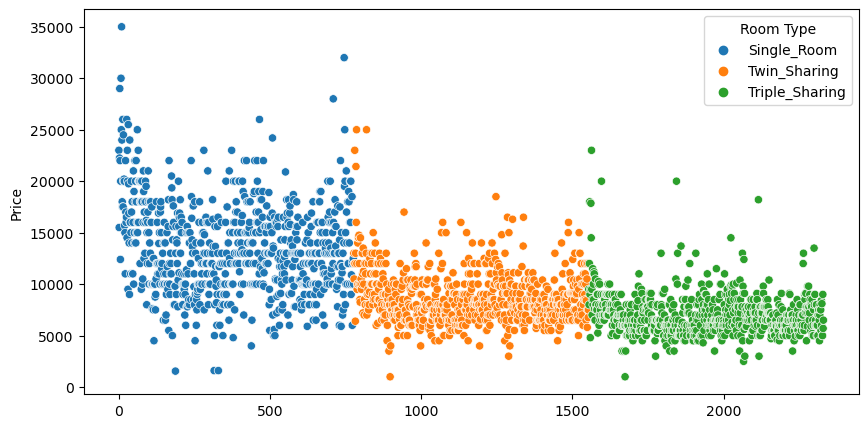

In [48]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=melted_df.index, y='Price', hue='Room Type', data=melted_df)

* Insights
* Analyzing Single_Room,Twin_sharing, Triple_sharing room price
1. PG all sharing prices lies between around 5000rs to 13000rs.
2. As we increase room sharing prices are decreasing i.e room sharing is inversly propotional to the price.

C:\Users\Admin\AppData\Local\Temp\ipykernel_3532\1098683552.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pg.corr(),annot=True)


<Axes: >

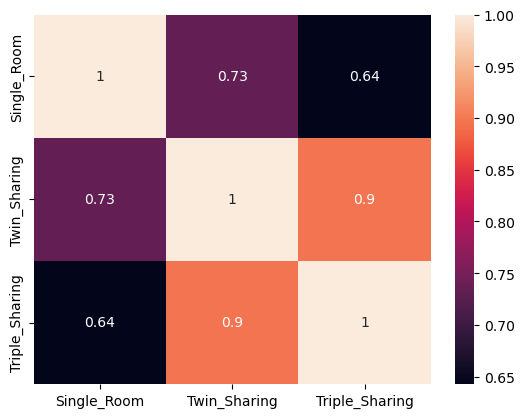

In [49]:
sns.heatmap(pg.corr(),annot=True)


* Insights
1. Single room column is Moderately correlated with Triple sharing and strongly correlated with twin sharing.
2. Twin sharing column is strongly correlated with triple sharing and single room.
3. Triple sharing room is moderately correlated with single room and strongly correlated with twin sharing

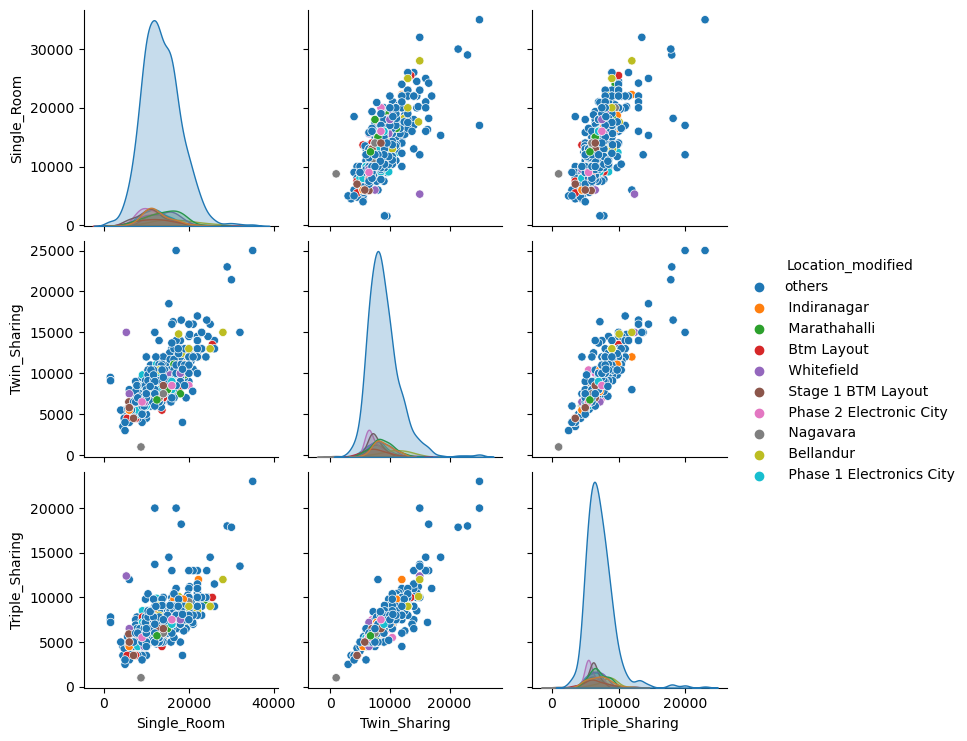

In [50]:
sns.pairplot(pg,hue='Location_modified')

* Insights 
* Multiple Locations of cities with their price distribution respect to room sharing. 

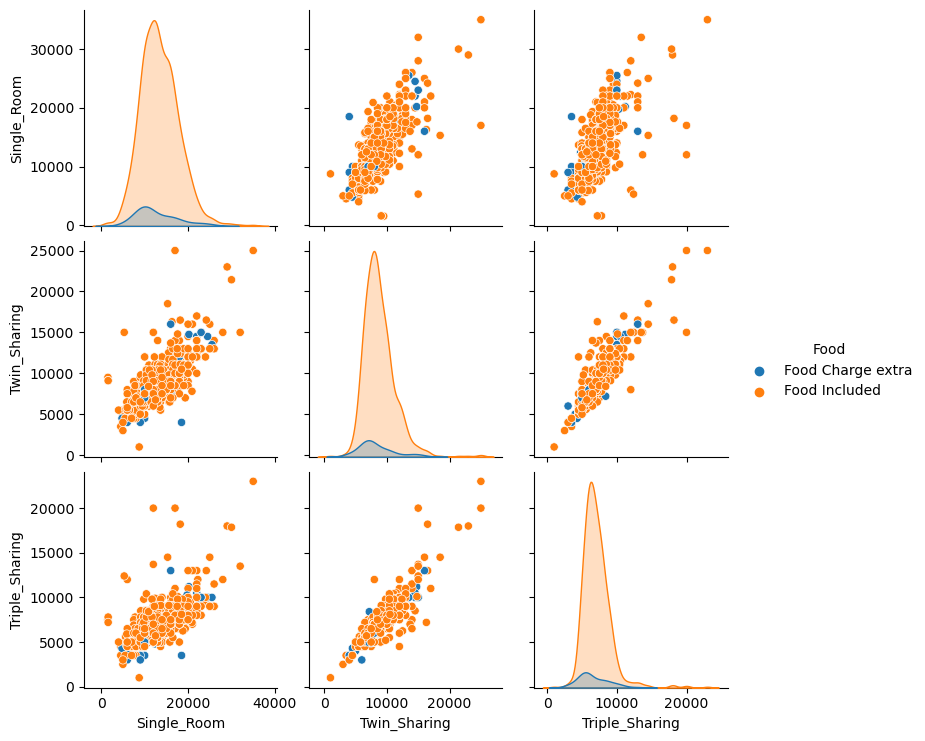

In [51]:
sns.pairplot(pg,hue='Food')

Text(0.5, 1.0, 'Twin sharing prices based on food')

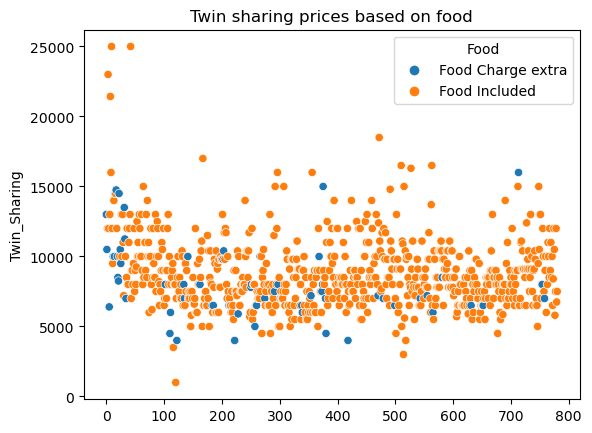

In [52]:
#plt.figure(figsize=(10, 5))
sns.scatterplot(x=pg.index,y=pg["Twin_Sharing"], hue = 'Food', data=pg)
plt.title('Twin sharing prices based on food')

Text(0.5, 1.0, 'Triple sharing prices based on food')

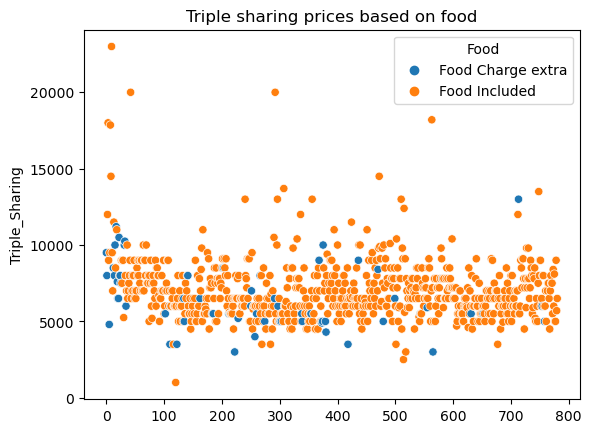

In [53]:
sns.scatterplot(x=pg.index,y=pg["Triple_Sharing"], hue = 'Food', data=pg)
plt.title('Triple sharing prices based on food')

Text(0.5, 1.0, 'Single room prices based on food')

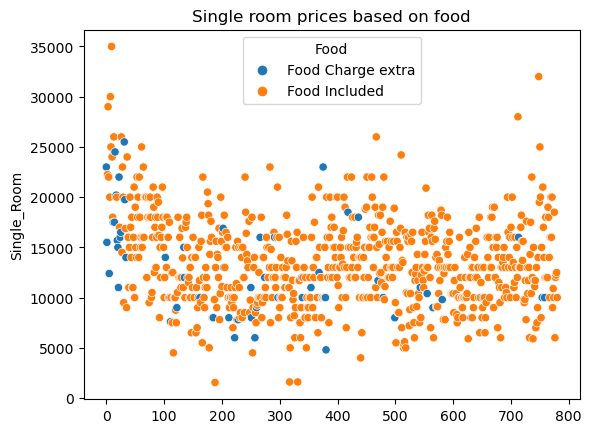

In [54]:
sns.scatterplot(x=pg.index,y=pg["Single_Room"], hue = 'Food', data=pg)
plt.title('Single room prices based on food')


In [55]:
sns

<module 'seaborn' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

Text(0, 0.5, 'Single_Room_Price')

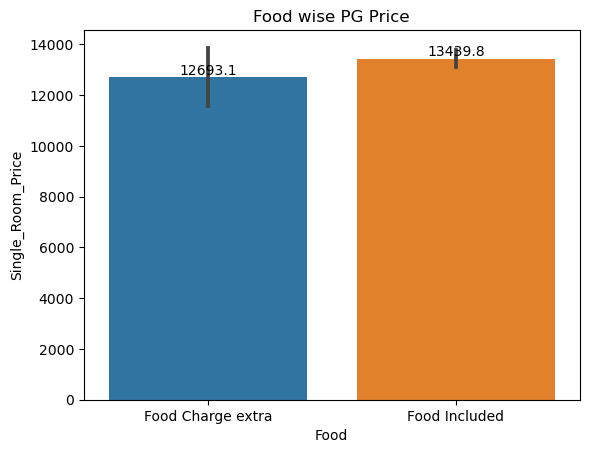

In [66]:
ax = sns.barplot(y="Single_Room", x = 'Food', data = pg)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Food wise PG Price")
plt.xlabel("Food")
plt.ylabel("Single_Room_Price")

Text(0, 0.5, 'Twin_Sharing_Price')

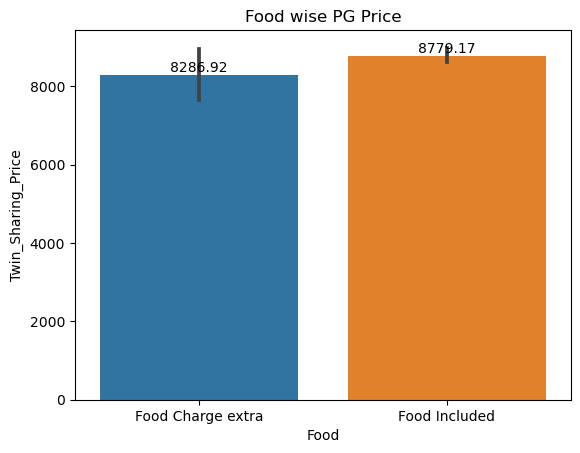

In [65]:
ax = sns.barplot(y="Twin_Sharing", x = 'Food', data = pg)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Food wise PG Price")
plt.xlabel("Food")
plt.ylabel("Twin_Sharing_Price")

Text(0, 0.5, 'Triple_Sharing_Price')

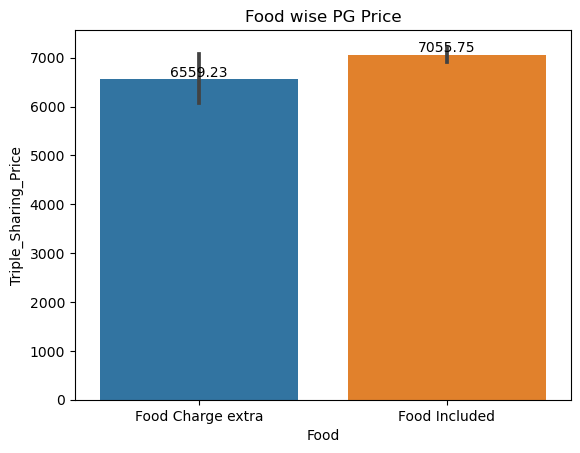

In [67]:
ax= sns.barplot(y="Triple_Sharing", x = 'Food', data = pg)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Food wise PG Price")
plt.xlabel("Food")
plt.ylabel("Triple_Sharing_Price")